<a href="https://colab.research.google.com/github/Shad38/CVPR-assignment/blob/main/MID/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)

In [26]:
n_samples = 1000
n_features = 2
n_classes = 5

X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=42, cluster_std=1.5)

# One-hot encode labels
try:
    encoder = OneHotEncoder(sparse_output=False)
except TypeError:
    encoder = OneHotEncoder(sparse=False)

Y = encoder.fit_transform(y.reshape(-1, 1))

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

print(f"Shapes: X_train={X_train.shape}, X_test={X_test.shape}, Y_train={Y_train.shape}, Y_test={Y_test.shape}")

Shapes: X_train=(800, 2), X_test=(200, 2), Y_train=(800, 5), Y_test=(200, 5)


In [27]:
class NeuralNetwork:
    def __init__(self, input_size, hidden1, hidden2, hidden3, output_size, lr=0.2, seed=42):
        np.random.seed(seed)
        self.lr = lr

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden1))

        self.W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2. / hidden1)
        self.b2 = np.zeros((1, hidden2))

        self.W3 = np.random.randn(hidden2, hidden3) * np.sqrt(2. / hidden2)
        self.b3 = np.zeros((1, hidden3))

        self.W4 = np.random.randn(hidden3, output_size) * np.sqrt(2. / hidden3)
        self.b4 = np.zeros((1, output_size))

In [30]:
def sigmoid(self, x, deriv=False):
        if deriv:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

def softmax(self, x):
      exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
      return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [31]:
def feedForward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.a2 @ self.W3 + self.b3
        self.a3 = self.sigmoid(self.z3)

        self.z4 = self.a3 @ self.W4 + self.b4
        self.output = self.softmax(self.z4)
        return self.output

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
def generate_data(samples_per_class=180):
    np.random.seed(42)
    c1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    c2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    c3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    c4 = np.random.randn(samples_per_class, 2) + np.array([2, 8])
    c5 = np.random.randn(samples_per_class, 2) + np.array([10, 8])

    X = np.vstack([c1, c2, c3, c4, c5])
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class +
                 [3]*samples_per_class + [4]*samples_per_class)
    return X, y

X, y = generate_data()

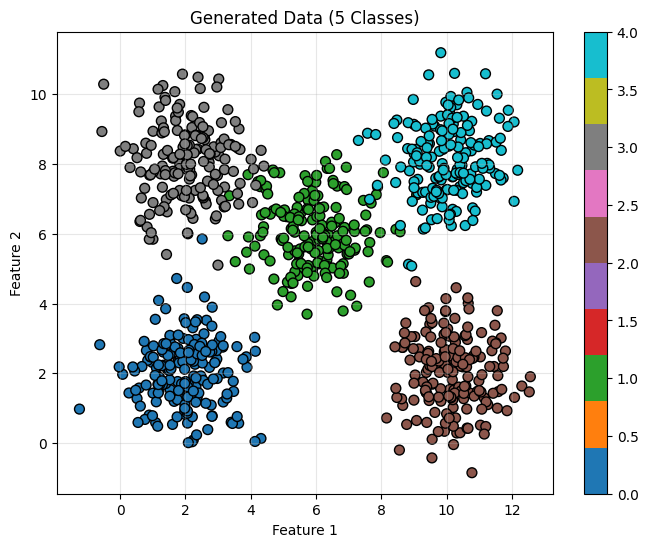

In [43]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", edgecolor="k", s=50)
plt.title("Generated Data (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.colorbar(scatter)
plt.show()

In [44]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Train / Validation / Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [45]:
class NeuralNet:
    def __init__(self, input_size, h1, h2, h3, output_size, lr):
        self.W1 = np.random.randn(input_size, h1)
        self.W2 = np.random.randn(h1, h2)
        self.W3 = np.random.randn(h2, h3)
        self.W4 = np.random.randn(h3, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feed_forward(self, x):
        self.Z1 = x @ self.W1
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = self.A1 @ self.W2
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = self.A2 @ self.W3
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = self.A3 @ self.W4
        self.A4 = self.softmax(self.Z4)
        return self.A4

    def backprop(self, x, y, out):
        dZ4 = out - y
        dZ3 = (dZ4 @ self.W4.T) * self.sigmoid(self.A3, derivative=True)
        dZ2 = (dZ3 @ self.W3.T) * self.sigmoid(self.A2, derivative=True)
        dZ1 = (dZ2 @ self.W2.T) * self.sigmoid(self.A1, derivative=True)

        self.W4 -= self.A3.T @ dZ4 * self.lr
        self.W3 -= self.A2.T @ dZ3 * self.lr
        self.W2 -= self.A1.T @ dZ2 * self.lr
        self.W1 -= x.T @ dZ1 * self.lr

    def train(self, x, y):
        out = self.feed_forward(x)
        self.backprop(x, y, out)

In [46]:
input_size = 2
hidden_size = 22
output_size = 5
lr = 0.0015
epochs = 1500

nn = NeuralNet(input_size, hidden_size, hidden_size, hidden_size, output_size, lr)

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)

    train_pred = nn.feed_forward(X_train)
    val_pred = nn.feed_forward(X_val)

    train_loss = -np.mean(np.sum(y_train * np.log(train_pred + 1e-9), axis=1))
    val_loss = -np.mean(np.sum(y_val * np.log(val_pred + 1e-9), axis=1))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    t_acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    v_acc = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))

    train_accs.append(t_acc)
    val_accs.append(v_acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Train Loss={train_loss:.4f} | Val Loss={val_loss:.4f} | "
              f"Train Acc={t_acc:.3f} | Val Acc={v_acc:.3f}")

Epoch    0 | Train Loss=1.9958 | Val Loss=1.9495 | Train Acc=0.331 | Val Acc=0.283
Epoch  100 | Train Loss=0.3636 | Val Loss=0.2983 | Train Acc=0.824 | Val Acc=0.861
Epoch  200 | Train Loss=0.2827 | Val Loss=0.2345 | Train Acc=0.911 | Val Acc=0.911
Epoch  300 | Train Loss=0.2652 | Val Loss=0.2165 | Train Acc=0.920 | Val Acc=0.917
Epoch  400 | Train Loss=0.2463 | Val Loss=0.1996 | Train Acc=0.922 | Val Acc=0.922
Epoch  500 | Train Loss=0.2332 | Val Loss=0.1891 | Train Acc=0.926 | Val Acc=0.922
Epoch  600 | Train Loss=0.2233 | Val Loss=0.1804 | Train Acc=0.933 | Val Acc=0.922
Epoch  700 | Train Loss=0.2158 | Val Loss=0.1745 | Train Acc=0.935 | Val Acc=0.933
Epoch  800 | Train Loss=0.2087 | Val Loss=0.1690 | Train Acc=0.941 | Val Acc=0.933
Epoch  900 | Train Loss=0.2323 | Val Loss=0.1901 | Train Acc=0.926 | Val Acc=0.917
Epoch 1000 | Train Loss=0.2018 | Val Loss=0.1649 | Train Acc=0.944 | Val Acc=0.950
Epoch 1100 | Train Loss=0.1956 | Val Loss=0.1595 | Train Acc=0.948 | Val Acc=0.950
Epoc

In [47]:
test_pred = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(actual_classes, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.82      0.92      0.87        36
           2       1.00      0.98      0.99        41
           3       0.96      1.00      0.98        27
           4       1.00      0.82      0.90        34

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



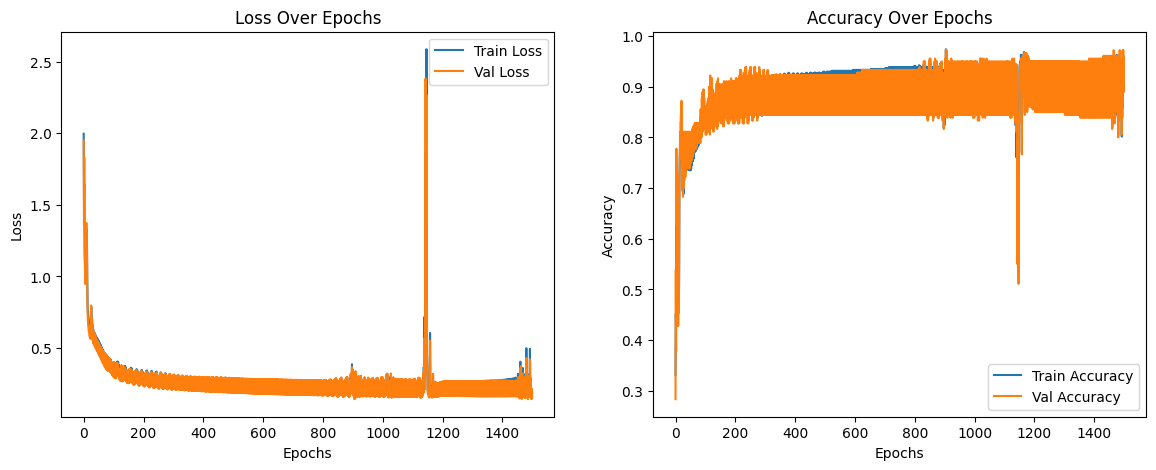

In [48]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

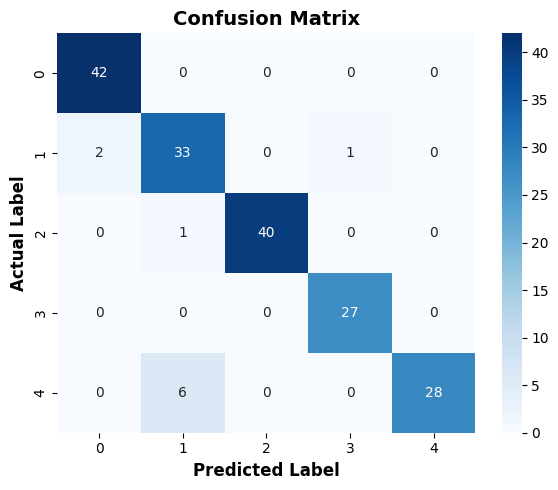

In [49]:
cm = confusion_matrix(actual_classes, predicted_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold')
plt.ylabel("Actual Label", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()